In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("data/company_data.csv")
df["is_ai"] = df["is_ai"].map({"Ai": 1, "Non Ai": 0})

In [4]:
rev_cols = [f"revenue_mil_y{y}" for y in range(2015, 2023+1)]
target_col = "revenue_mil_y2023"   # last known year

# X = []
# y = []

# for idx, row in df.iterrows():
#     revenues = row[rev_cols].values

#     # create sliding windows
#     for i in range(len(revenues) - 9):
#         X.append(list(revenues[i:i+9]) + [row["is_ai"]])
#         y.append(revenues[i+9])  # next year

# X = pd.DataFrame(X, columns=[f"y{i}" for i in range(1,10)] + ["is_ai"])
# y = pd.Series(y)

rev_cols = [f"revenue_mil_y{y}" for y in range(2015, 2023+1)]  # 9 years
emp_cols = [f"employees_y{y}" for y in range(2015, 2023+1)]

X = df[rev_cols + ["is_ai"] ]
y = df["revenue_mil_y2023"]   # target 


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = LGBMRegressor(
       n_estimators=300,
    learning_rate=0.02
)

model.fit(
    X_train, 
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='l1',
    # early_stopping_rounds=30,  # stops if no improvement in 50 rounds
    # verbose=50
)
# Predictions
pred = model.predict(X_test)

# Regression metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("Model Performance:")
print(f"MAE  (Mean Absolute Error): {mae:.3f}")
print(f"MSE  (Mean Squared Error):  {mse:.3f}")
print(f"RMSE (Root MSE):            {rmse:.3f}")
print(f"R² Score (Accuracy):        {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1966
[LightGBM] [Info] Number of data points in the train set: 670, number of used features: 10
[LightGBM] [Info] Start training from score 29082.020113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

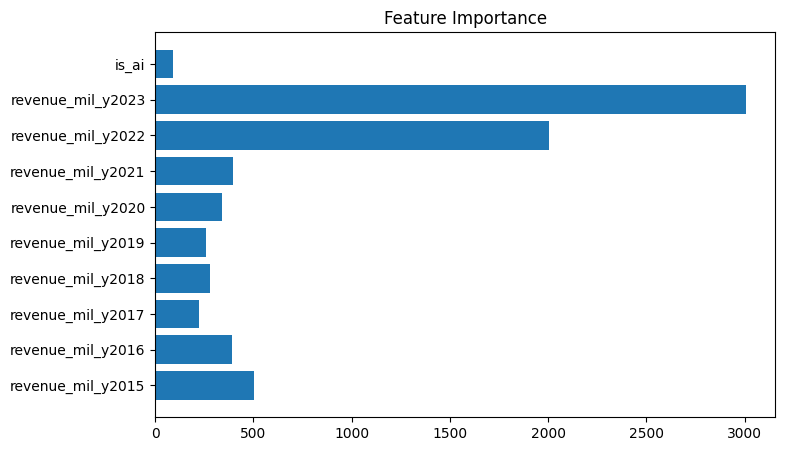

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.02, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 300, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [6]:
plt.figure(figsize=(8,5))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()

print(model.get_params())

In [7]:
def predict_future(model, past_revenues, is_ai, years):
    preds = []
    current_window = list(past_revenues[-9:])  # keep last 9 years
    
    for _ in range(years):
        inp = current_window + [is_ai]

        # Prediction Here
        next_rev = model.predict([inp])[0]
        preds.append(next_rev)
        
        # slide window
        current_window = current_window[1:] + [next_rev]
    
    return preds
def plot_revenue_forecast(past_revenues, future_revenues, start_year=2015):
    past_years = list(range(start_year, start_year + len(past_revenues)))
    future_years = list(range(past_years[-1], past_years[-1] + 1 + len(future_revenues)))

    plt.figure(figsize=(12, 6))
    future_revenues = [past_revenues[-1]] + future_revenues

    # Plot historical revenue
    plt.plot(past_years, past_revenues, marker="o", linewidth=2, label="Historical Revenue")

    # Plot future predicted revenue
    plt.plot(future_years, future_revenues, marker="o", linestyle="--", linewidth=2, label="Forecasted Revenue")

    plt.title("Company Revenue Forecast")
    plt.xlabel("Year")
    plt.ylabel("Revenue (Million USD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

0


/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarnin

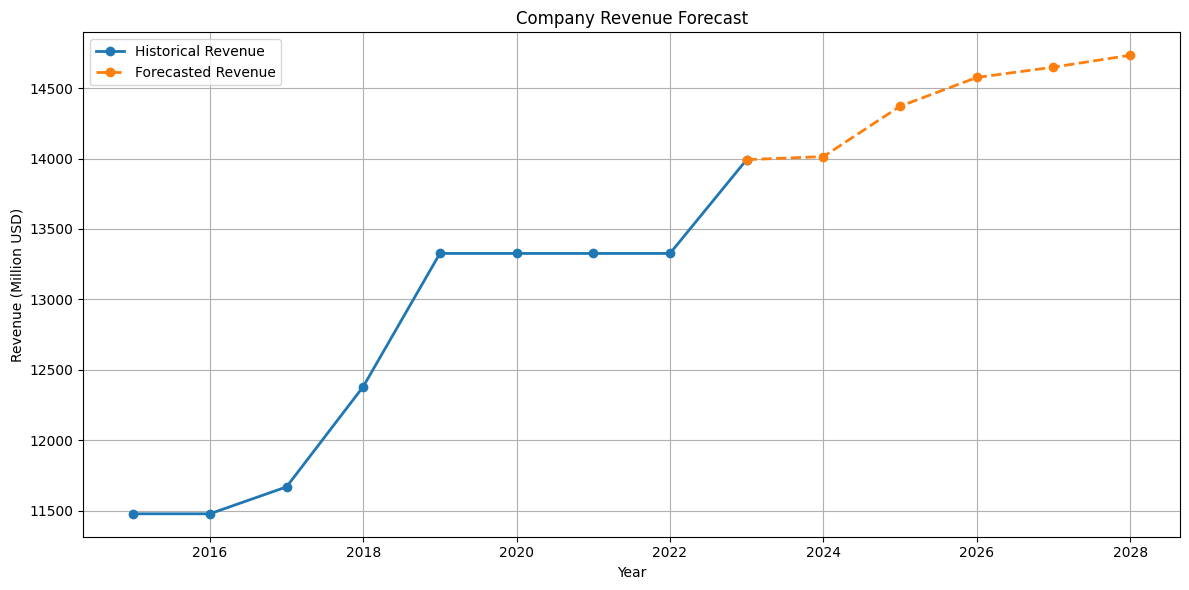

[np.float64(14013.681531079596), np.float64(14371.388743587599), np.float64(14575.663944449434), np.float64(14649.01481186657), np.float64(14733.397171043369)]


In [15]:
row = 13
past_9_years_rev = [
    df.loc[row, f"revenue_mil_y{y}"] 
    for y in range(2015, 2024)
]

is_ai_flag = df.loc[row, "is_ai"]
print(is_ai_flag)

future_revenues = predict_future(model, past_9_years_rev, is_ai_flag, years=5)
plot_revenue_forecast(past_9_years_rev, future_revenues, start_year=2015)

print(future_revenues)


1


/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/desktop-potato/Desktop/abc/gfct/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarnin

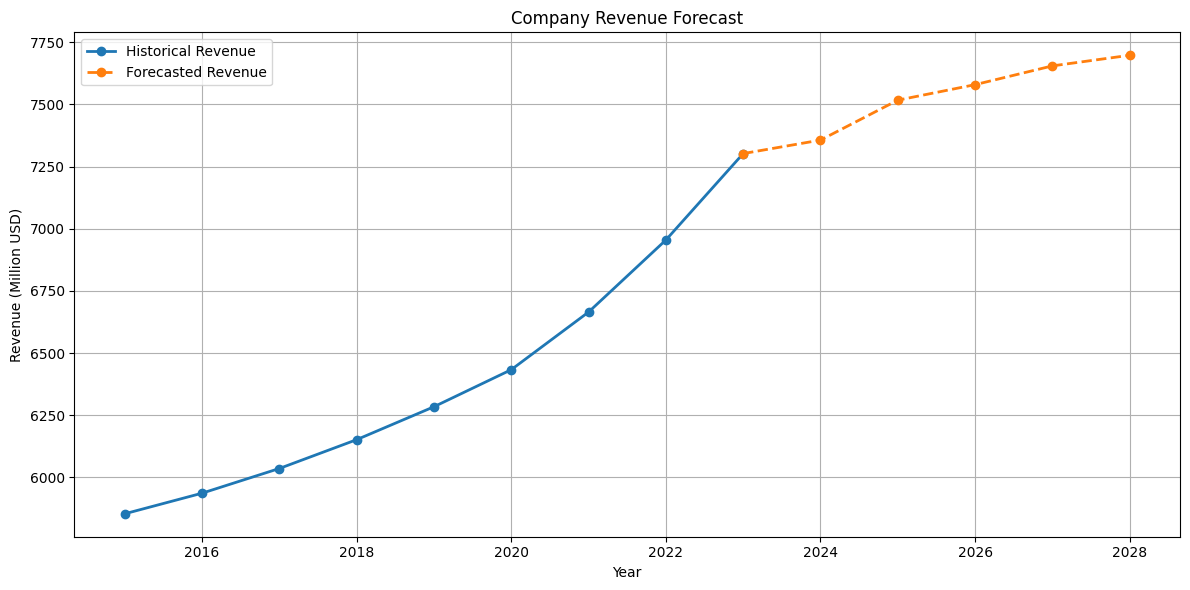

[np.float64(7356.211851904419), np.float64(7516.674114488771), np.float64(7579.052119381637), np.float64(7654.512622473988), np.float64(7697.196242225955)]


In [18]:
row = 12
past_9_years_rev = [
    df.loc[row, f"revenue_mil_y{y}"] 
    for y in range(2015, 2024)
]

is_ai_flag = df.loc[row, "is_ai"]
print(is_ai_flag)

future_revenues = predict_future(model, past_9_years_rev, is_ai_flag, years=5)
plot_revenue_forecast(past_9_years_rev, future_revenues, start_year=2015)

print(future_revenues)